Irisデータセットに対してhcmによるクラスタリング

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
#不動小数点計算のエラーが起きたときの動作を指定、divideは0で除算した時、invalidはよくわからん
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み、一行目はヘッダーじゃない
iris= pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)

#クラスタ数宣言
c=3
#max繰り返し回数の宣言
max_iter=100
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape


# 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
new_centroids = np.zeros((c, dimension))
    
# 各データ所属クラスタ情報を保存する配列を用意
cluster = np.zeros(X_size)

#重心と各点との最小距離を格納
sum_distance = []
min_distance = []

#目的関数のリスト作成
J = []
#目的関数の初期値作成
best_J = 10000
#目的関数の時の重心の初期値
best_centroids = np.ones((c, dimension))

#HCMアルゴリズム
for s in range(max_iter):
    # ランダムに重心の初期値を初期化
    centroids  = X[np.random.choice(X_size,c)]
    # ループ上限回数まで繰り返し
    for epoch in range(max_iter):
    # 入力データ全てに対して繰り返し
        for i in range(X_size):
            # データから各重心までの距離(v)を計算（ルートを取らなくても大小関係は変わらないので省略）
            distances = np.sum((centroids - X[i]) ** 2, axis=1)
            #一番近い重心との距離を格納(v)
            min_distance.append(min(distances))

            # データの所属クラスタを距離の一番近い重心を持つものに更新,clusterには一番近い重心のインデックス
            # cluster[i] = np.argsort(distances)[0]
            cluster[i] = np.argmin(distances)

        #目的関数の値をリストmin_distanceに格納 
        sum_distance.append(sum(min_distance))
        #重心と各点との最小距離を格納するリストの初期化
        min_distance =list()

        # すべてのクラスタに対して重心を再計算
        for j in range(c):
            new_centroids[j] = X[cluster==j].mean(axis=0)
    
        # もしも重心が変わっていなかったら終了
        if (np.allclose(new_centroids, centroids)):
            # print(f"重心が変わっていないので{epoch}回目で終了")
            break
        centroids =  np.copy(new_centroids)

    
    if best_J > sum_distance[-1]:
        #最適な目的関数の更新
        best_J = sum_distance[-1]
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        np_cluster = np.copy(cluster)
        # print("best_J",best_J)

print("目的関数の値は"+str(best_J))
#クラスター番号ごとに実際に振り分けられた個数を数える
np_cluster = np_cluster.astype(np.int64)
print("クラスター個数",np.bincount(np_cluster))
print("クラスター中心\n",best_centroids)

目的関数の値は78.94084142614598
クラスター個数 [50 62 38]
クラスター中心
 [[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


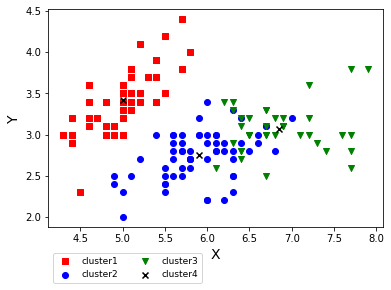

In [12]:
#matplotlibに描写

colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x")
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

plt.show()

# 正解とのクラスター番号を合わせる作業セル¶

In [87]:
#正解リスト作成
dff = pd.read_csv("../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values
seikai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
np_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

上記の二つのリストを比較してclusterの番号を変更していく
(1→2,2→1)

In [89]:
cluster_hensyuu = cluster
cluster_hensyuu_0 = np.where(cluster_hensyuu==1, 100, cluster)
cluster_hensyuu_1 = np.where(cluster_hensyuu_0==2, 1, cluster_hensyuu_0)
cluster_hensyuu_2 = np.where(cluster_hensyuu_1==100, 2, cluster_hensyuu_1)

In [110]:
#------正解率の算出
seikaisuu = np.count_nonzero(cluster_hensyuu_2==seikai)
seikairitu= (np.count_nonzero(cluster_hensyuu_2==seikai))/X_size*100
print("正解率")
print(seikairitu)
print("正解数")
print(seikaisuu)
print("クラスタサイズ確認")
print(np.count_nonzero(cluster_hensyuu==0))
print(np.count_nonzero(cluster_hensyuu==1))
print(np.count_nonzero(cluster_hensyuu==2))

正解率
89.33333333333333
正解数
134
クラスタサイズ確認
50
38
62


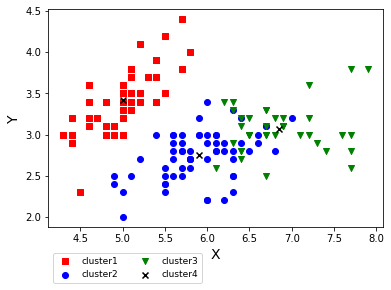

In [94]:
#matplotlibに描写

colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(c):
    ax.scatter(X[:, 0][cluster_hensyuu_2==i], X[:, 1][cluster_hensyuu_2==i], color=colors[i],marker=markers[i])
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x")
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

plt.show()
# fig.savefig("iris_hcm.pdf",bbox_inches='tight')

# 評価関数を適用

In [98]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
#csvファイル書き出しセル
#pandasで分割結果を記入
df["cluster"]=cluster
df["J"] = best_J
df.to_csv('Iris-hcm.csv',index=False)

In [14]:
import pandas as pd
test= pd.read_csv("Iris-hcm.csv")
test

,sepal_length,sepal_width,petal_length,petal_width,cluster,J,F
0,5.1,3.5,1.4,0.2,2.0,78.940841,78.940841
1,4.9,3.0,1.4,0.2,2.0,78.940841,78.940841
2,4.7,3.2,1.3,0.2,2.0,78.940841,78.940841
3,4.6,3.1,1.5,0.2,2.0,78.940841,78.940841
4,5.0,3.6,1.4,0.2,2.0,78.940841,78.940841
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0,78.940841,78.940841
146,6.3,2.5,5.0,1.9,0.0,78.940841,78.940841
147,6.5,3.0,5.2,2.0,1.0,78.940841,78.940841
148,6.2,3.4,5.4,2.3,1.0,78.940841,78.940841


## cal_Fによって一応再計算

In [99]:
def calc_F(c,cluster,X,v,m,u):
    #中心間距離の作成
    center_distance = np.zeros((c,c))
    for i in range(c):
        for j in range(c):
            center_distance[i][j]= np.sum((v[i]-v[j])**2)
    print("center_distance")
    print(center_distance)
    #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
    d_list=[]
    for i in range(X_size):
        for j in range(c):
            d_list.append(np.sum((X[i]-v[j])**2))
    d = np.array(d_list)
    d = d.reshape([X_size,c])
    print("d_{ki}")
    print(d[0])

    new_d = np.zeros((X_size,c))
    #ここが怪しい
    for i in range(c):
        new_d[cluster == i] = d[cluster == i]+center_distance[i]
    print("new_d{ki} = d_{ki}+d_{ii*}")
    print(new_d[0])

    #評価関数計算(ついでにJも再計算してあってるか確認)
    F = 0
    kakunin_J = 0
    u_m = u**m
    for i in range(X_size):
        F += np.sum(u[i] * new_d[i])
        kakunin_J += np.sum(u_m[i] * d[i])


    #この初期値のときの結果が優れている場合，bestを更新
    print("Jの値:",J)
    print("Jの値を再計算:",kakunin_J)
    print("Fの値:",F)
    return F

In [102]:
#帰属度の作成
u = np.zeros((X_size,c))
for i in range(c):
    if i == 0:
        s = np.array([1,0,0])
    elif i == 1:
        s = np.array([0,1,0])
    else:
        s = np.array([0,0,1])
    u[cluster == i] = s

In [105]:
F = calc_F(c,np_cluster,X,best_centroids,1,u)

center_distance
[[ 0.         25.15919532 11.24855058]
 [25.15919532  0.          3.22986242]
 [11.24855058  3.22986242  0.        ]]
d_{ki}
[2.15920000e-02 2.55989612e+01 1.16912747e+01]
new_d{ki} = d_{ki}+d_{ii*}
[2.15920000e-02 5.07581565e+01 2.29398253e+01]
Jの値: []
Jの値を再計算: 78.94084142614598
Fの値: 78.94084142614598


In [106]:
best_J

78.94084142614598

In [108]:
hcm = pd.read_csv("Iris-hcm.csv")
hcm

,sepal_length,sepal_width,petal_length,petal_width,cluster,J,F
0,5.1,3.5,1.4,0.2,2.0,78.940841,78.940841
1,4.9,3.0,1.4,0.2,2.0,78.940841,78.940841
2,4.7,3.2,1.3,0.2,2.0,78.940841,78.940841
3,4.6,3.1,1.5,0.2,2.0,78.940841,78.940841
4,5.0,3.6,1.4,0.2,2.0,78.940841,78.940841
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0,78.940841,78.940841
146,6.3,2.5,5.0,1.9,0.0,78.940841,78.940841
147,6.5,3.0,5.2,2.0,1.0,78.940841,78.940841
148,6.2,3.4,5.4,2.3,1.0,78.940841,78.940841
